In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

In [ ]:
dataset = [[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]]

In [ ]:
weights = [-0.1, 0.20653640140000007, -0.23418117710000003]
for row in dataset:
     prediction = predict(row, weights)
     print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1


In [ ]:
#Train network Dataset

In [ ]:
#Make a prediction with weights
def predict(row, weights):
  activation = weights[0]
  for i in range(len(row)-1):
    activation += weights[i + 1] * row[i]
  return 1.0 if activation >= 0.0 else 0.0

In [ ]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
  weights = [0.0 for i in range(len(train[0]))]
  for epoch in range(n_epoch):
    sum_error = 0.0
    for row in train:
      prediction = predict(row, weights)
      error = row[-1] - prediction
      sum_error += error**2
      weights[0] = weights[0] + l_rate * error
      for i in range(len(row)-1):
        weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
  return weights

In [ ]:
# Calculate weights
dataset = [[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]]
l_rate = 0.1
n_epoch = 10
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.100, error=2.000
>epoch=1, lrate=0.100, error=1.000
>epoch=2, lrate=0.100, error=0.000
>epoch=3, lrate=0.100, error=0.000
>epoch=4, lrate=0.100, error=0.000
>epoch=5, lrate=0.100, error=0.000
>epoch=6, lrate=0.100, error=0.000
>epoch=7, lrate=0.100, error=0.000
>epoch=8, lrate=0.100, error=0.000
>epoch=9, lrate=0.100, error=0.000
[-0.1, 0.20653640140000007, -0.23418117710000003]


In [ ]:
# Perceptron Algorithm on the Sonar Dataset
from random import seed
from random import randrange
from csv import reader

In [ ]:
# Load a CSV file
def load_csv(filename):
  dataset = list()
  with open(filename, r ) as file:
    csv_reader = reader(file)
    for row in csv_reader:
      if not row:
        continue
      dataset.append(row)
  return dataset

In [ ]:
# Convert string column to float
def str_column_to_float(dataset, column):
  for row in dataset:
    row[column] = float(row[column].strip())

In [ ]:
# Convert string column to integer
def str_column_to_int(dataset, column):
  class_values = [row[column] for row in dataset]
  unique = set(class_values)
  lookup = dict()
  for i, value in enumerate(unique):
    lookup[value] = i
  for row in dataset:
    row[column] = lookup[row[column]]
  return lookup

In [ ]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
  dataset_split = list()
  dataset_copy = list(dataset)
  fold_size = int(len(dataset) / n_folds)
  for _ in range(n_folds):
    fold = list()
    while len(fold) < fold_size:
      index = randrange(len(dataset_copy))
      fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)
  return dataset_split

In [ ]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
  correct = 0
  for i in range(len(actual)):
    if actual[i] == predicted[i]:
      correct += 1
  return correct / float(len(actual)) * 100.0

In [ ]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
  folds = cross_validation_split(dataset, n_folds)
  scores = list()
  for fold in folds:
    train_set = list(folds)
    train_set.remove(fold)
    train_set = sum(train_set, [])
    test_set = list()
    for row in fold:
      row_copy = list(row)
      test_set.append(row_copy)
      row_copy[-1] = None
    predicted = algorithm(train_set, test_set, *args)
    actual = [row[-1] for row in fold]
    accuracy = accuracy_metric(actual, predicted)
    scores.append(accuracy)
  return scores

In [ ]:
# Make a prediction with weights
def predict(row, weights):
  activation = weights[0]
  for i in range(len(row)-1):
    activation += weights[i + 1] * row[i]
  return 1.0 if activation >= 0.0 else 0.0

In [ ]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
  weights = [0.0 for i in range(len(train[0]))]
  for _ in range(n_epoch):
    for row in train:
      prediction = predict(row, weights)
      error = row[-1] - prediction
      weights[0] = weights[0] + l_rate * error
      for i in range(len(row)-1):
        weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
  return weights

In [ ]:
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
  predictions = list()
  weights = train_weights(train, l_rate, n_epoch)
  for row in test:
    prediction = predict(row, weights)
    predictions.append(prediction)
  return(predictions)

In [ ]:
# Test the Perceptron algorithm on the sonar dataset
seed(1)

In [ ]:
# Load a CSV file
def load_csv(filename):
  dataset = list()
  with open(filename, 'r') as file:
    csv_reader = reader(file)
    for row in csv_reader:
      if not row:
        continue
      dataset.append(row)
  return dataset

In [ ]:
# load and prepare data
filename = 'sonar.all-data.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
  str_column_to_float(dataset, i)
# convert string class to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 3
l_rate = 0.1
n_epoch = 20
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [79.71014492753623, 73.91304347826086, 68.11594202898551]
Mean Accuracy: 73.913%



Learning Rate: 0.01, Activation Function: sign


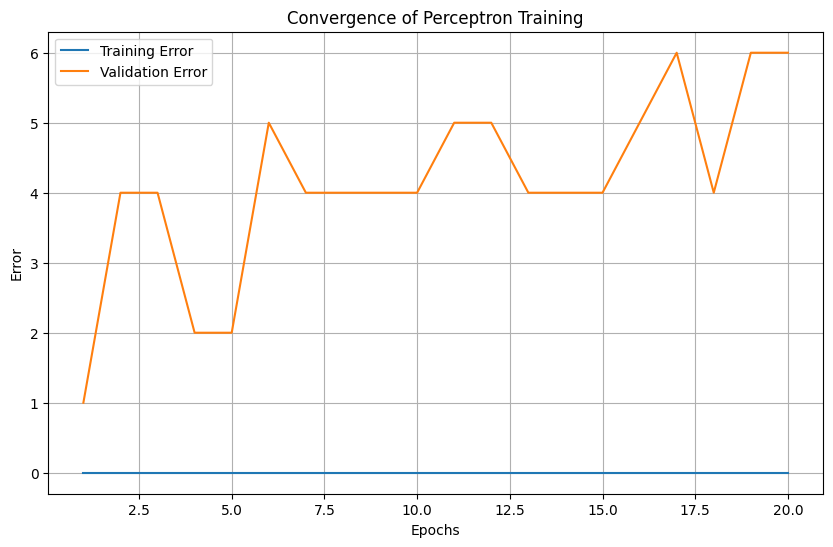


Learning Rate: 0.01, Activation Function: sigmoid


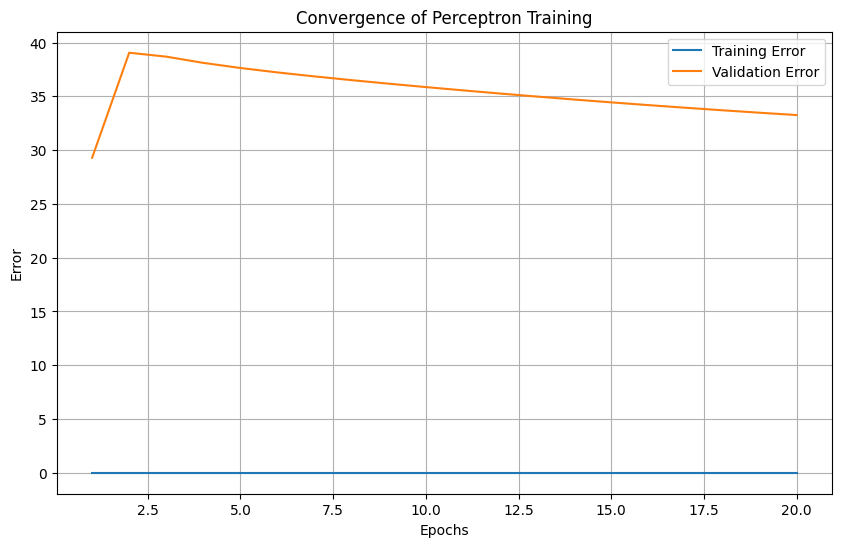


Learning Rate: 0.001, Activation Function: sign


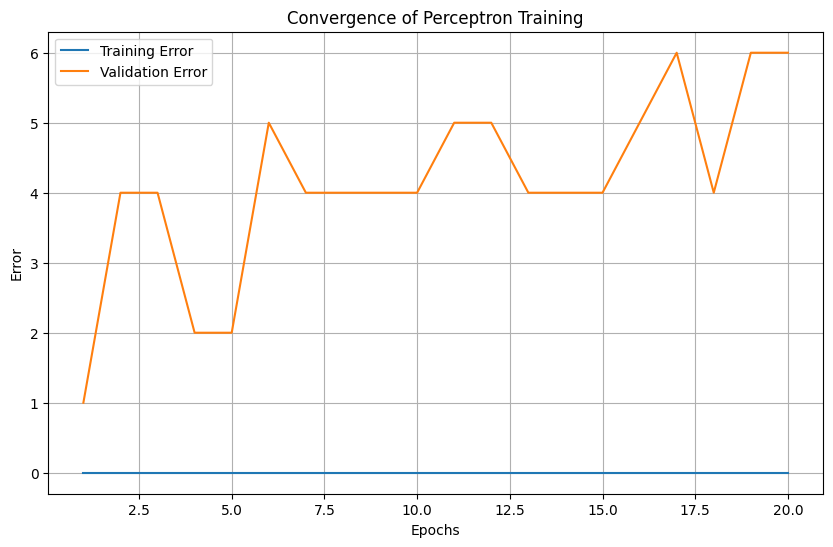


Learning Rate: 0.001, Activation Function: sigmoid


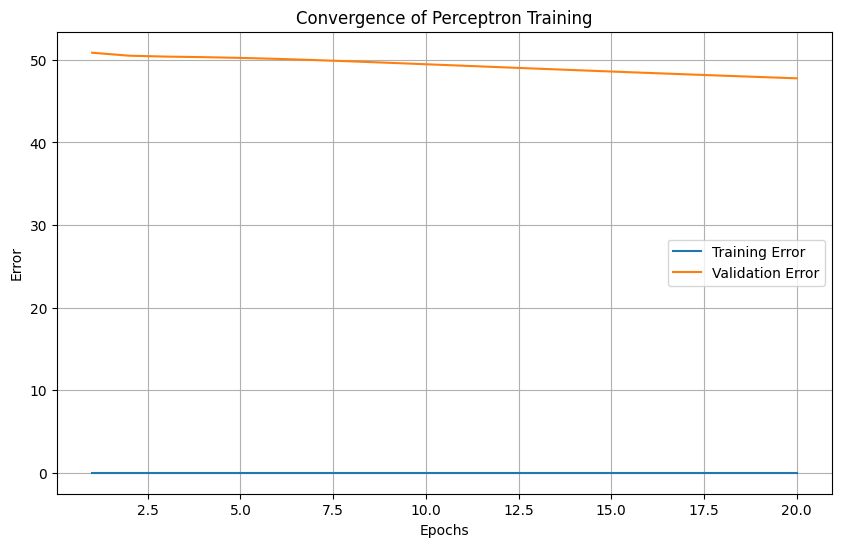


Learning Rate: 0.1, Activation Function: sign


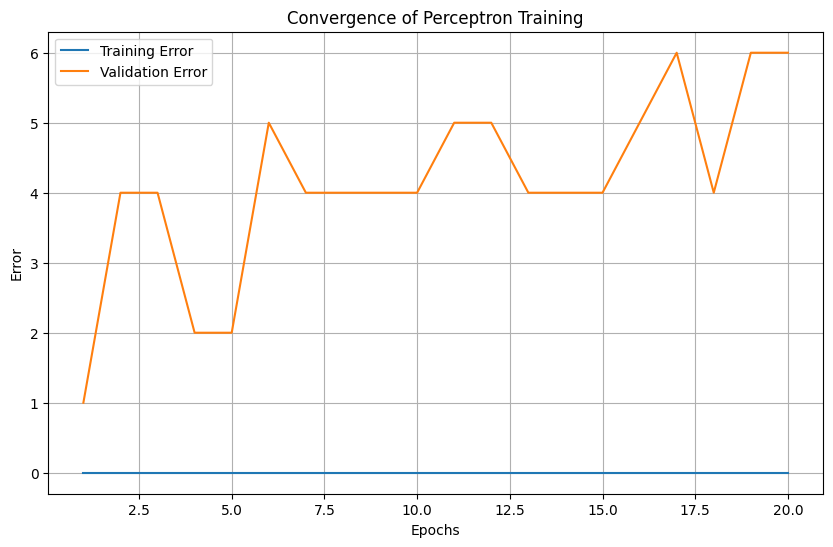


Learning Rate: 0.1, Activation Function: sigmoid


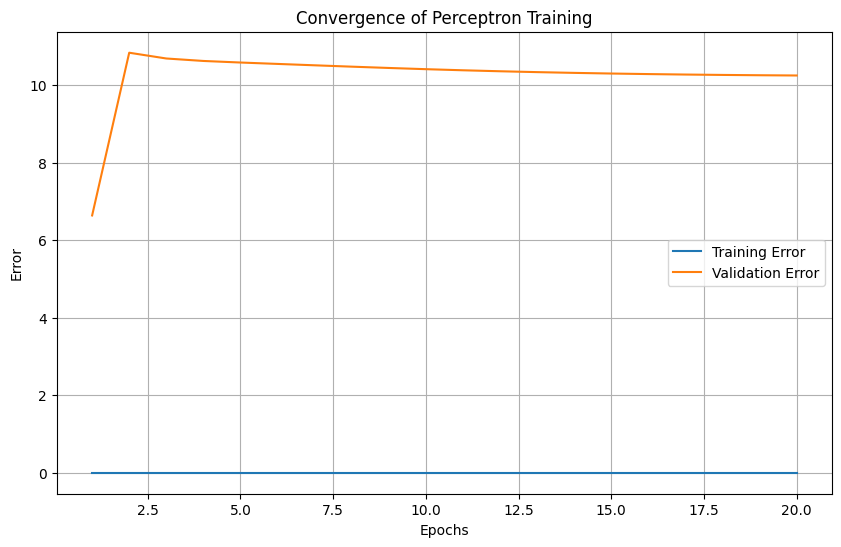

In [ ]:
# Modify the predict function to accept activation function
def predict(row, weights, activation='sign'):
    activation_value = weights[0]
    for i in range(len(row)-1):
        activation_value += weights[i + 1] * row[i]
    if activation == 'sign':
        return 1.0 if activation_value >= 0.0 else 0.0
    elif activation == 'sigmoid':
        import math
        return 1.0 / (1.0 + math.exp(-activation_value))

# Define function to train perceptron and return errors for each epoch
def train_perceptron(train, l_rate, n_epoch, activation='sign'):
    training_errors = []
    validation_errors = []
    weights = [0.0 for _ in range(len(train[0]))]
    for epoch in range(n_epoch):
        training_error = 0.0
        validation_error = 0.0
        for row in train:
            prediction = predict(row, weights, activation)  # Pass activation function
            error = row[-1] - prediction
            if row[-2] == 0:
                training_error += error**2
            else:
                validation_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-2):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        training_errors.append(training_error)
        validation_errors.append(validation_error)
    return training_errors, validation_errors

# Plot the convergence graph with training and validation errors
def plot_convergence_graph(training_errors, validation_errors, n_epoch):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_epoch + 1), training_errors, label='Training Error')
    plt.plot(range(1, n_epoch + 1), validation_errors, label='Validation Error')
    plt.title('Convergence of Perceptron Training')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Tune the learning rate and activation function
learning_rates = [0.01, 0.001, 0.1]
activations = ['sign', 'sigmoid']

for l_rate in learning_rates:
    for activation in activations:
        print(f"\nLearning Rate: {l_rate}, Activation Function: {activation}")
        train_errors, val_errors = train_perceptron(dataset, l_rate, n_epoch, activation)
        plot_convergence_graph(train_errors, val_errors, n_epoch)



Number of Epochs: 10


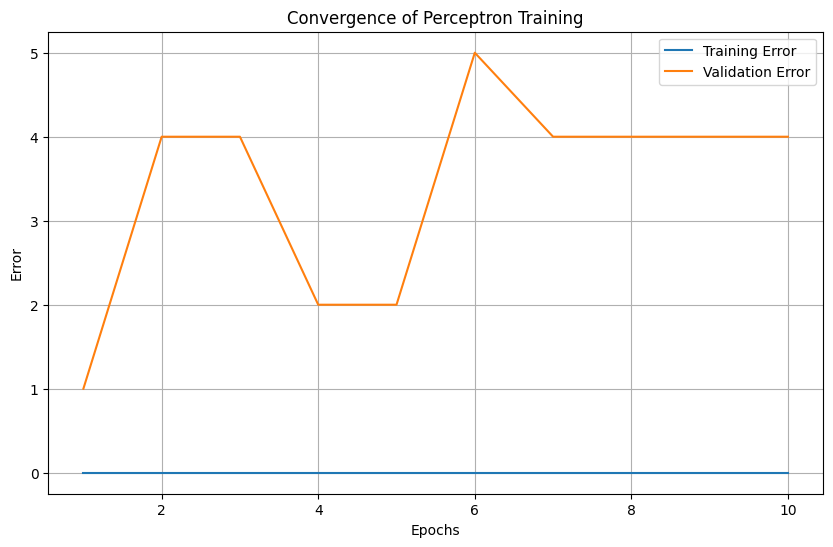


Number of Epochs: 11


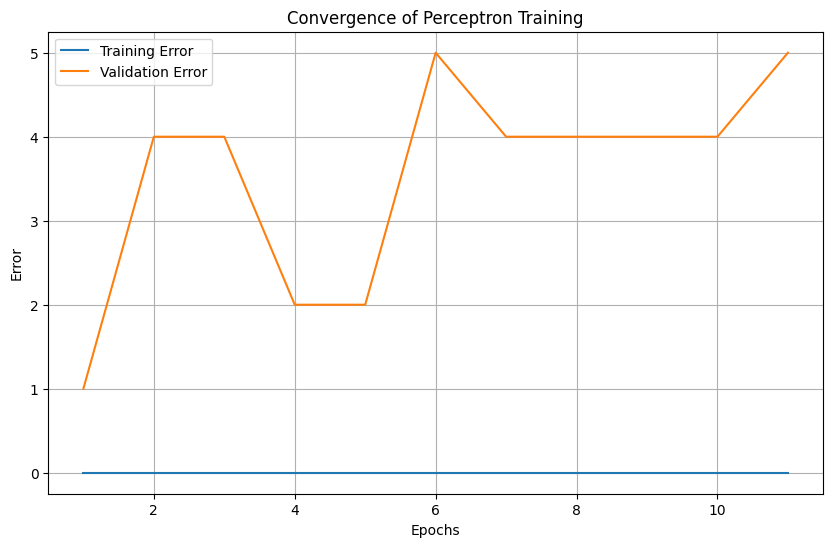


Number of Epochs: 12


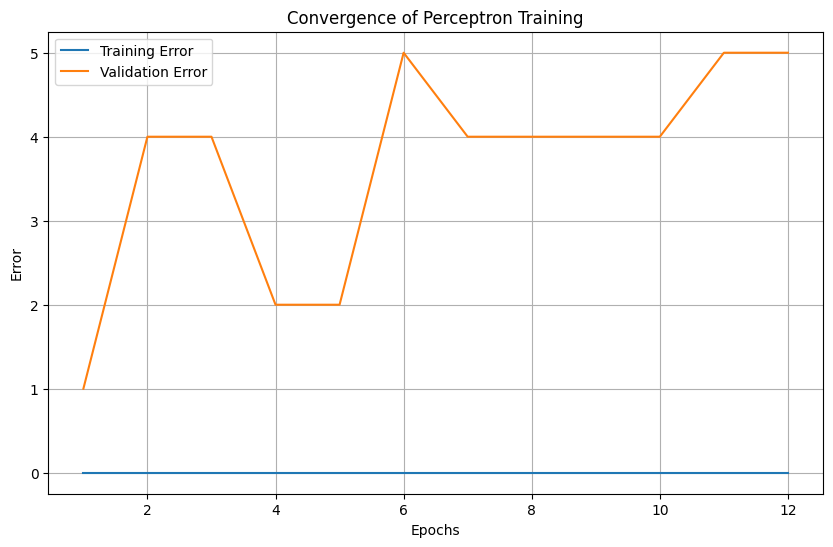


Number of Epochs: 13


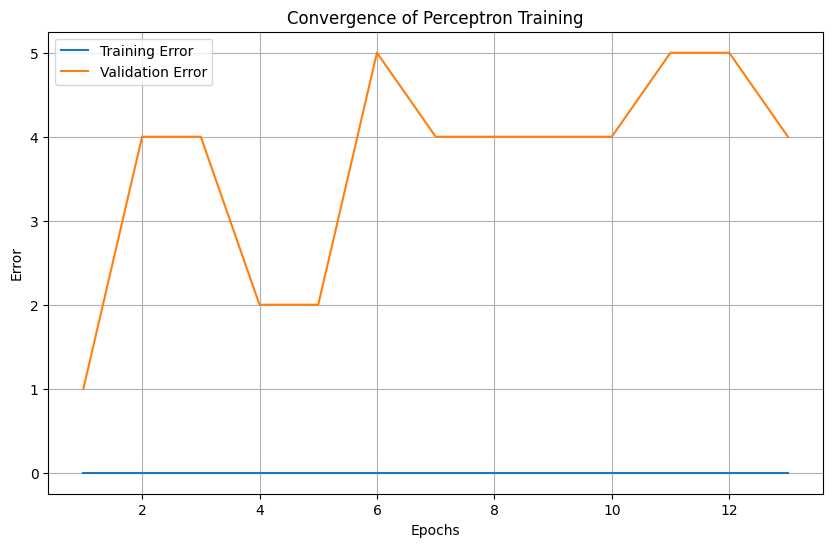


Number of Epochs: 14


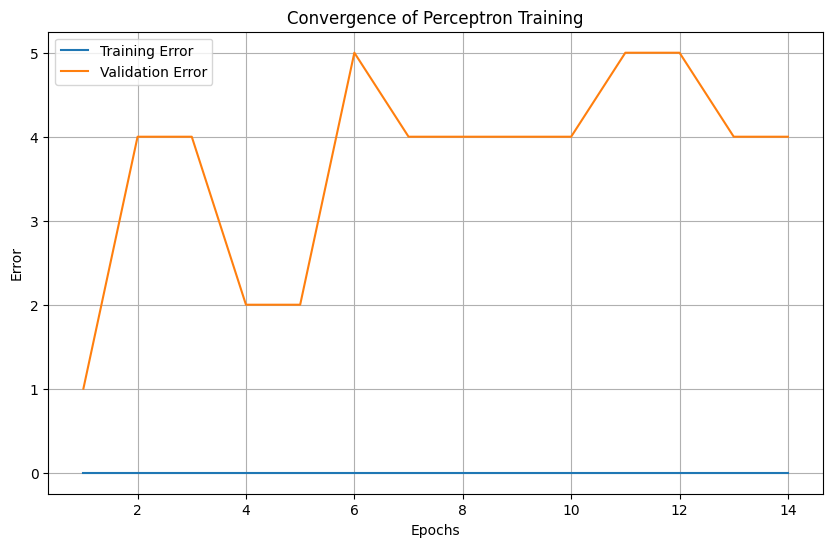


Number of Epochs: 15


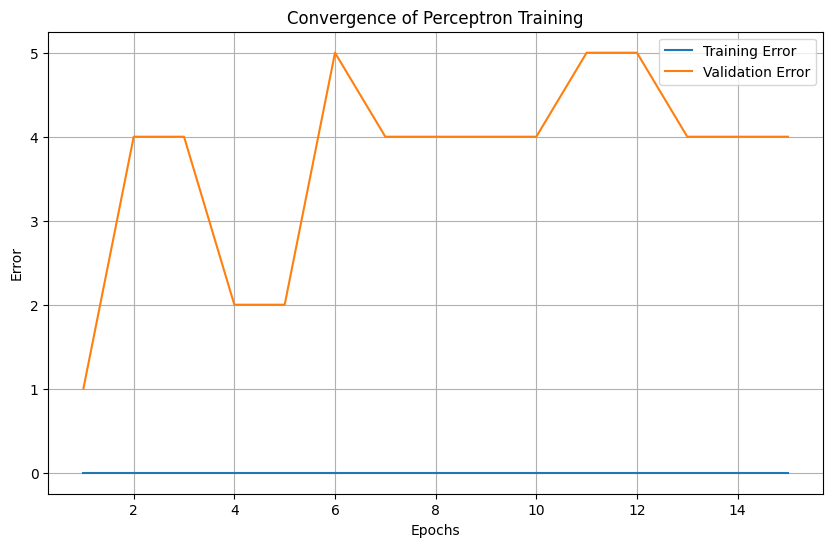


Number of Epochs: 16


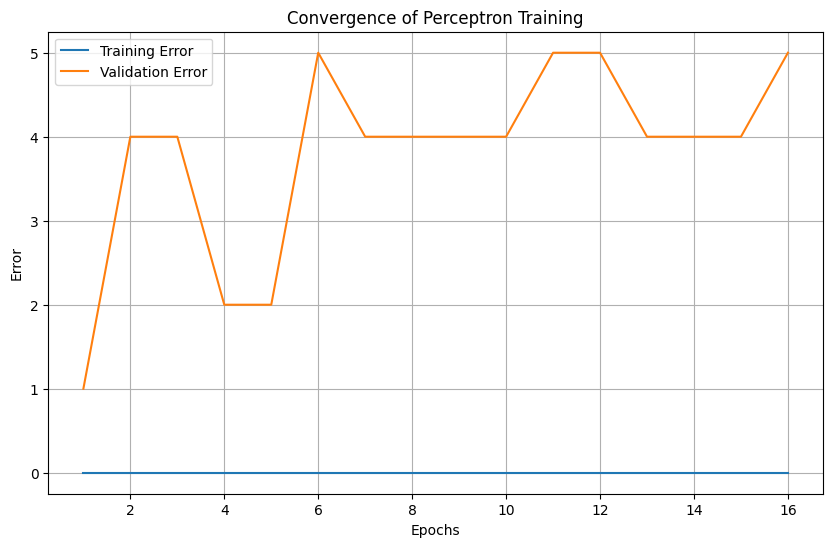


Number of Epochs: 17


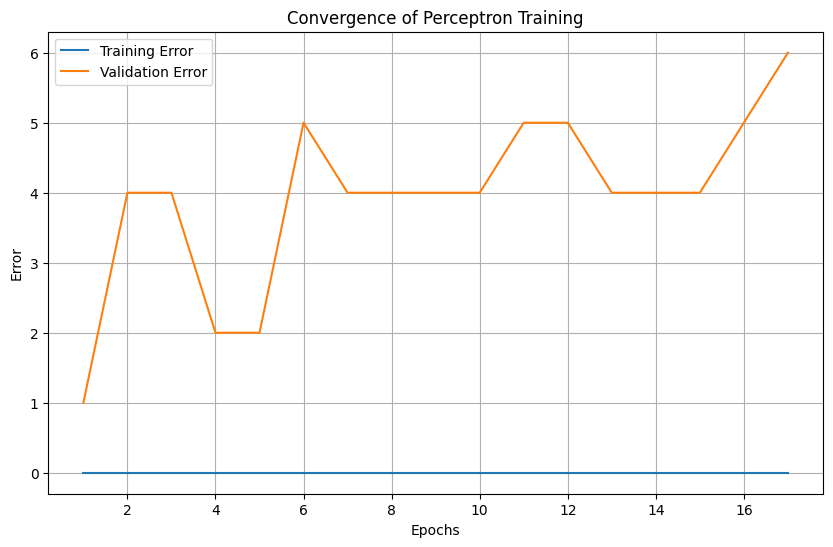


Number of Epochs: 18


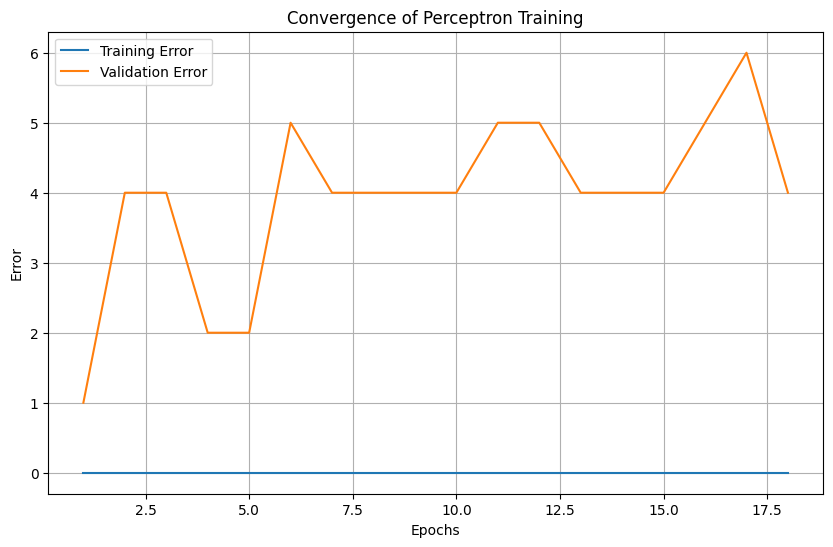


Number of Epochs: 19


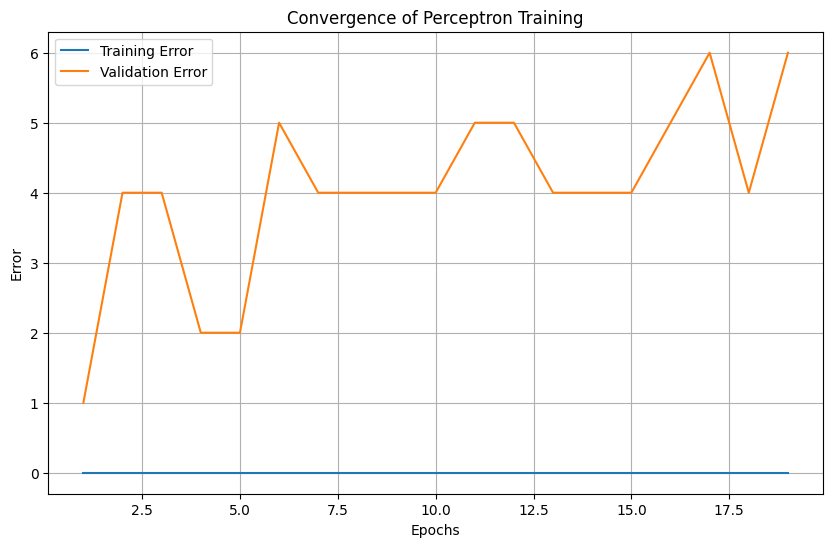


Number of Epochs: 20


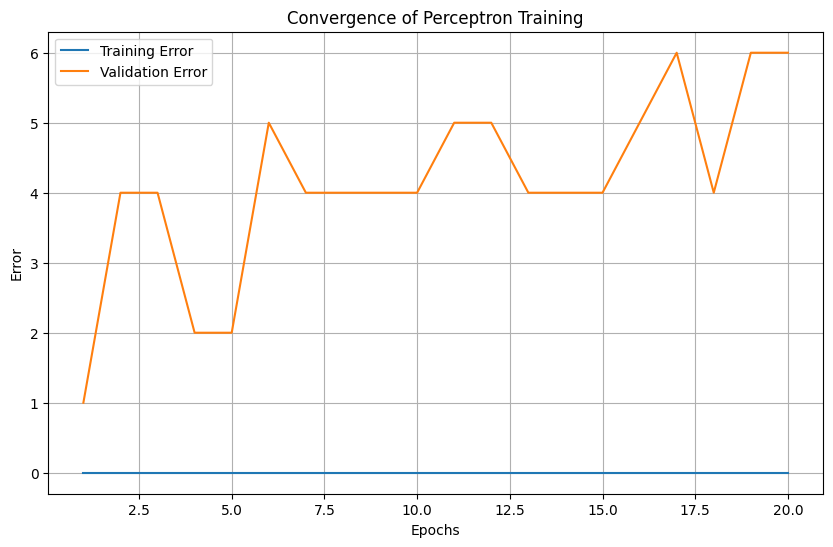

In [ ]:
# Define function to train perceptron and return errors for each epoch
def train_perceptron(train, l_rate, n_epoch, activation='sign'):
    training_errors = []
    validation_errors = []
    weights = [0.0 for _ in range(len(train[0]))]
    for epoch in range(n_epoch):
        training_error = 0.0
        validation_error = 0.0
        for row in train:
            prediction = predict(row, weights, activation)
            error = row[-1] - prediction
            if row[-2] == 0:
                training_error += error**2
            else:
                validation_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-2):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        training_errors.append(training_error)
        validation_errors.append(validation_error)
    return training_errors, validation_errors

# Plot the convergence graph with training and validation errors
def plot_convergence_graph(training_errors, validation_errors, n_epoch):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_epoch + 1), training_errors, label='Training Error')
    plt.plot(range(1, n_epoch + 1), validation_errors, label='Validation Error')
    plt.title('Convergence of Perceptron Training')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Tune the number of epochs and plot the convergence graph
epochs_range = range(10, 21)
l_rate = 0.1
activation = 'sign'

for n_epoch in epochs_range:
    print(f"\nNumber of Epochs: {n_epoch}")
    train_errors, val_errors = train_perceptron(dataset, l_rate, n_epoch, activation)
    plot_convergence_graph(train_errors, val_errors, n_epoch)


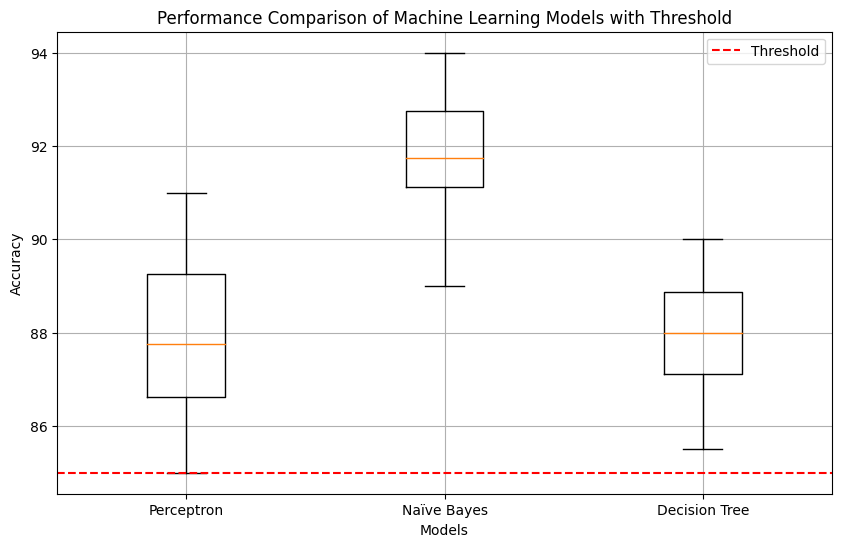

In [ ]:
import matplotlib.pyplot as plt

# Hypothetical data
perceptron_data = [87.0, 90.0, 88.5, 86.0, 85.0, 91.0, 89.5, 86.5, 88.0, 87.5]
naive_bayes_data = [92.0, 91.0, 90.5, 93.0, 94.0, 89.0, 91.5, 93.5, 92.0, 91.5]
decision_tree_data = [86.0, 88.0, 89.0, 87.5, 85.5, 90.0, 88.5, 87.0, 89.5, 88.0]

# Combine data for box plot
data = [perceptron_data, naive_bayes_data, decision_tree_data]

# Threshold value
threshold = 85.0

# Create box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['Perceptron', 'Naïve Bayes', 'Decision Tree'])
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Performance Comparison of Machine Learning Models with Threshold')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()